In [3]:
import pandas as pd
df = pd.read_csv("results_fp32_imsizeall.csv", header=0, names=["model_name", "ms", "top1", "imsize"])
df

,model_name,ms,top1,imsize
0,eva02_large_patch14_448.mim_m38m_ft_in22k_in1k,171.216855,91.129,448.0
1,eva_giant_patch14_336.clip_ft_in1k,166.430612,91.058,336.0
2,eva02_large_patch14_448.mim_in22k_ft_in22k_in1k,171.713104,91.020,448.0
3,eva_giant_patch14_560.m30m_ft_in22k_in1k,581.268339,90.969,560.0
4,eva02_large_patch14_448.mim_in22k_ft_in1k,172.717285,90.922,448.0
...,...,...,...,...
980,mobilenetv3_small_075.lamb_in1k,4.622502,72.312,224.0
981,lcnet_050.ra2_in1k,2.962799,70.423,224.0
982,tf_mobilenetv3_small_minimal_100.in1k,3.508353,70.098,224.0
983,tinynet_e.in1k,3.923039,66.806,106.0


In [4]:
pareto_front = []

for i, row in df.iterrows():
    if i == 0:
        pareto_front.append(row)
    if pareto_front[-1]["ms"] > row["ms"]:
        pareto_front.append(row)

In [27]:
pareto_front_df = pd.DataFrame(pareto_front)
pareto_front_df

,model_name,ms,top1,imsize
0,eva02_large_patch14_448.mim_m38m_ft_in22k_in1k,171.216855,91.129,448.0
1,eva_giant_patch14_336.clip_ft_in1k,166.430612,91.058,336.0
6,eva_large_patch14_336.in22k_ft_in1k,63.140216,90.903,336.0
10,eva_large_patch14_336.in22k_ft_in22k_in1k,62.997179,90.862,336.0
14,convnext_large_mlp.clip_laion2b_soup_ft_in12k_...,42.128077,90.678,384.0
17,convnext_large_mlp.clip_laion2b_augreg_ft_in1k...,41.946158,90.633,384.0
23,eva_large_patch14_196.in22k_ft_in22k_in1k,20.766191,90.555,196.0
28,eva_large_patch14_196.in22k_ft_in1k,20.695734,90.533,196.0
49,convnext_large_mlp.clip_laion2b_augreg_ft_in1k,18.875470,90.309,256.0
100,convnext_base.fb_in22k_ft_in1k,15.665774,89.858,288.0


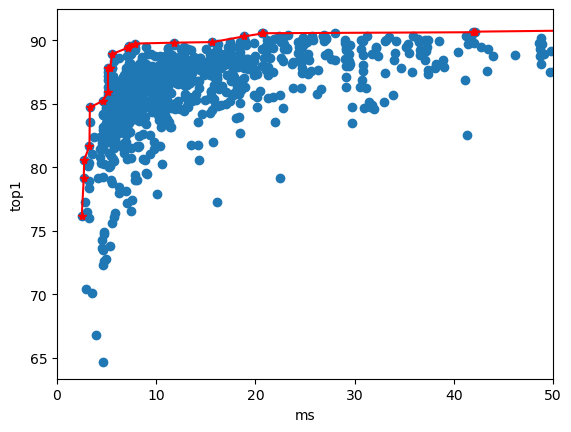

In [28]:
import matplotlib.pyplot as plt

plt.scatter(df[["ms"]], df[["top1"]])
plt.xlim(0, 50)
plt.plot(pareto_front_df[["ms"]], pareto_front_df[["top1"]], color="red", marker="*")
plt.xlabel("ms")
plt.ylabel("top1")
plt.savefig("results.jpg")